<a href="https://colab.research.google.com/github/SKitavi/Smarthive-ai/blob/main/SmartHive_AI_customer_segmentation_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name: SmartHive AI**

## Project Type - Unsupervised ML

## **Github**

Link: https://github.com/SKitavi/Smarthive-ai

## **Problem Statement**

In Kenya's competitive retail market, small businesses often face challenges in effectively targeting and engaging a diverse customer base. Ineffective marketing strategies, stemming from a lack of detailed customer insights, lead to wasted marketing budgets and missed revenue opportunities. For small businesses, these inefficiencies can result in marketing costs increasing by up to 30% and customer retention rates dropping by 20%. To address these challenges, SmartHive AI offers a data-driven customer segmentation model tailored for small businesses, aiming to improve marketing efficiency, increase revenue by up to 15%, and enhance customer retention by 25%.

**Stakeholders:** Marketing Team, Sales Team, Product Development Team.


## **Objectives**


*   Build a data-driven model to segment customers based on their purchasing behaviour, demographics, preferences, and engagement patterns.
*   Measure and Evaluate the Impact of Segmentation Strategies

*   Deploy these capabilities through an interactive dashboard,or web
application enabling marketing teams to visualise segments, execute targeted campaigns, and monitor their performance in real-time.


# **1. Data Collection and Preparation**

For this project, we will mainly be using the Online Retail.xlsx dataset. The dataset includes features such as customer demographics, purchase history, frequency of purchases, monetary value of purchases, and other relevant variables that can help in segmenting customers effectively.

## Data Description

Attribute Information:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.

## **Importing Libraries**

In [1]:
#importing important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

# #set style
# # plt.style.use('seaborn')
# sns.set()


# # setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titlesize"] = 25
# plt.rcParams["axes.titleweight"] = 'bold'
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["legend.fontsize"] = 15
# plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')
from numpy import math

## **Data Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
file_path='/content/drive/MyDrive/Copy of Online Retail.xlsx - Online Retail.csv'

## **Data Preview**

In [21]:
# Use Panda Library To read The CSV file
# .head() helps to read top 5 records of dataset
retail_df=pd.read_csv(file_path,sep=",",encoding="ISO-8859-1")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [23]:
#.tail() reads bottom 5 records
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [24]:
#information on data types of the attributes
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### **Observations**
* ***Datatype of InvoiceDate is object need to convert it into datatime.***
* ***If InvoiceNo starts with C means it's a cancellation. We need to drop these entries.***


In [22]:
# shape of dataset
retail_df.shape

(541909, 8)

There are 541,909 rows/records and 8 columns in this dataset.

In [25]:
#for numeric description of the attributes
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [27]:
# Check for null values
null_values = retail_df.isnull().sum()

print("Null values in each column:\n", null_values)

Null values in each column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


* ***There are null values in CustomerID and Description.***

In [26]:
# Count the number of duplicates
duplicate_count = retail_df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 5268


In [29]:
# Count the number of unique rows
unique_rows_count = retail_df.drop_duplicates().shape[0]
print("\nNumber of unique rows:", unique_rows_count)

# Check for unique values in specific columns
# For example, to check the uniqueness of 'CustomerID' column:
unique_customer_count = retail_df['CustomerID'].nunique()
print("\nNumber of unique customers:", unique_customer_count)


Number of unique rows: 536641

Number of unique customers: 4372


In [31]:
#Summary Statistics for Numerical Features

print("\nSummary Statistics:")
retail_df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## **Data Cleaning**

### **1. Null Values**

Text(0.5, 1.0, ' Visualising Missing Values')

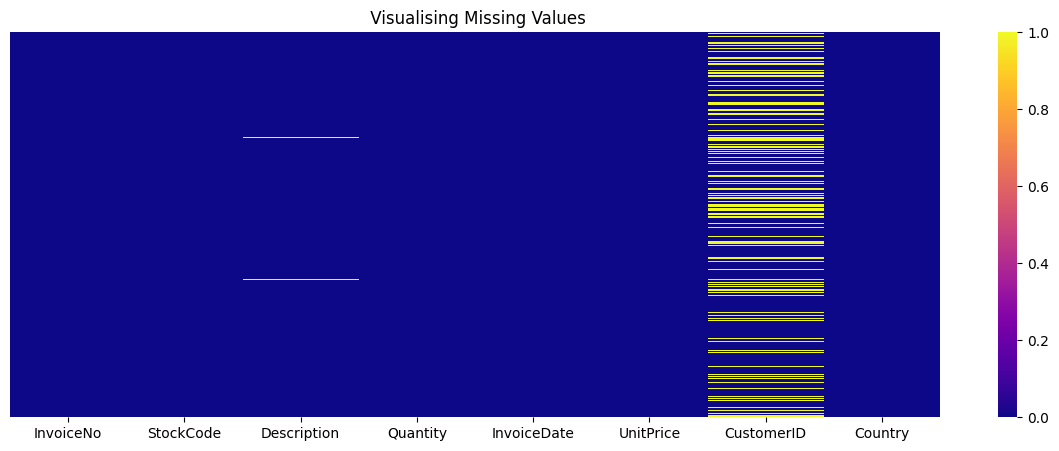

In [32]:
# Visualizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### **Observations**
***Missing values in CustomerID and Description columns.***

***CustomerID is our identification feature so if its missing this means the other values wont help us in analysis***

***Dropping all missing datapoints in Customer ID***

In [33]:
retail_df.dropna(inplace=True)

In [34]:
retail_df.shape

(406829, 8)

Now we have 406,829 records after removing null datapoints.

### **2. Data Wrangling**

In [35]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


* ***Here we can see that min value for Quantity column is negative.***
* ***UnitPrice has 0 as min value***
* ***Need to Explore these columns***

In [36]:
# dataframe has negative values in the Quantity column hence negative min.
retail_df[retail_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


***Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. So we need to drop these entries.***

In [37]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [38]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop these entries.
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

***Unit Price min is 0. To solve this;***

In [39]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so wE will drop these values
len(retail_df[retail_df['UnitPrice']==0])

40

In [40]:
# taking unitprice values greater than 0.
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [41]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


***Now our values are okay and we have eliminated the negative and zero minimums***

In [42]:
retail_df.shape

(397884, 8)

***We have 397,884 datapoints left after cleaning.***

## **Feature** **Engineering**

In [44]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 12/1/10 8:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%m/%d/%y %H:%M")
# Changed the format string to match the actual format "month/day/year hour:minute"
# %y is used for 2-digit year and %Y is used for 4-digit year.

In [45]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [46]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [47]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [48]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [49]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


## **EDA(Exploratory Data Analysis)**

In [50]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

### **1. Univariate Analysis**

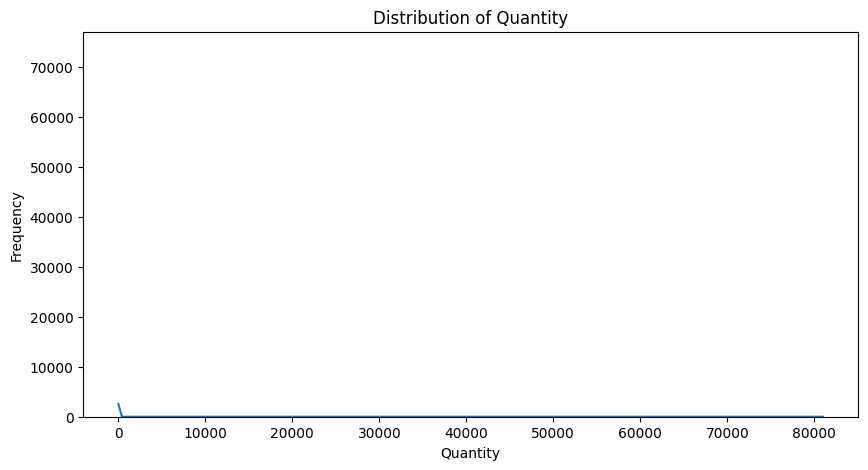

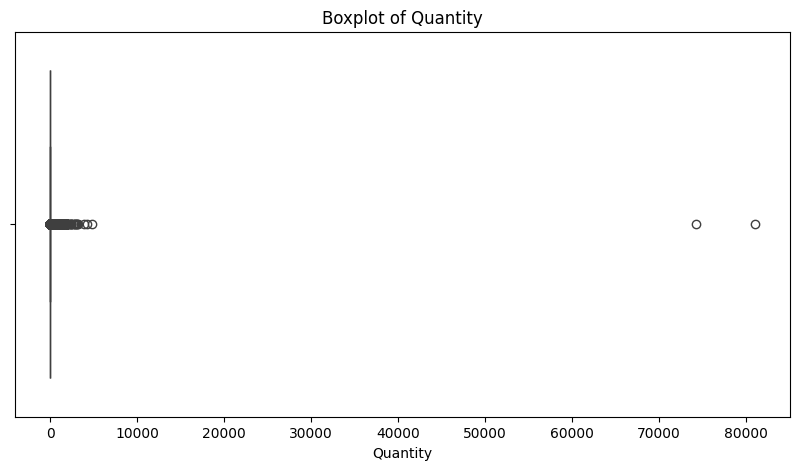


Summary Statistics for Quantity:
count    397884.000000
mean         12.988238
std         179.331775
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


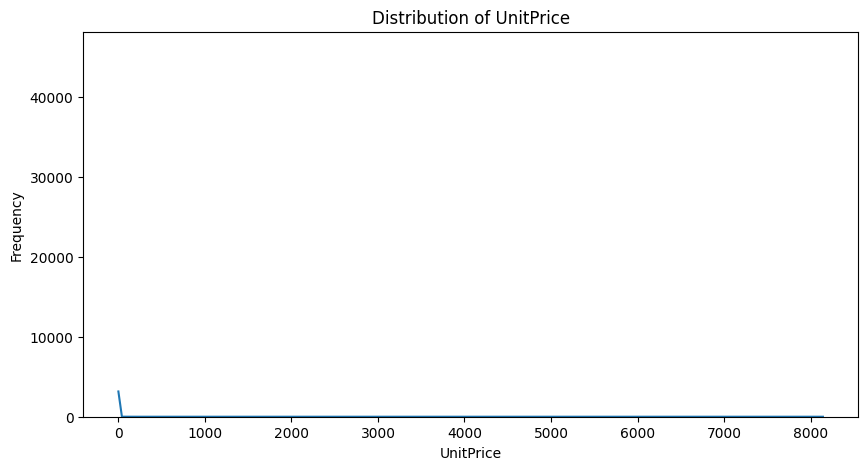

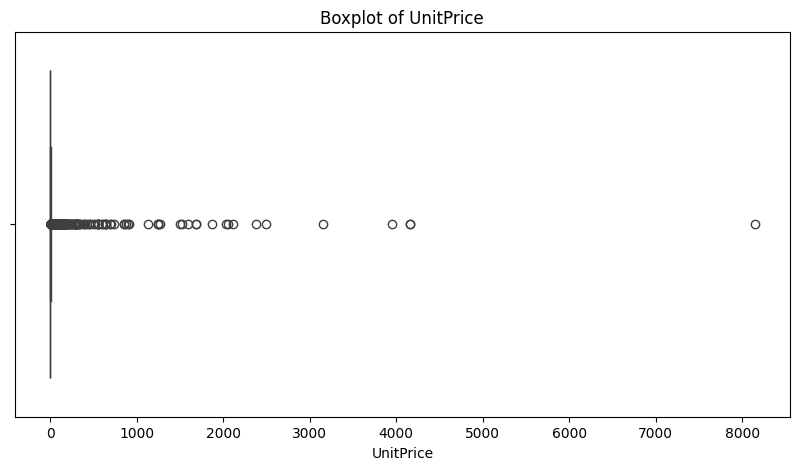


Summary Statistics for UnitPrice:
count    397884.000000
mean          3.116488
std          22.097877
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


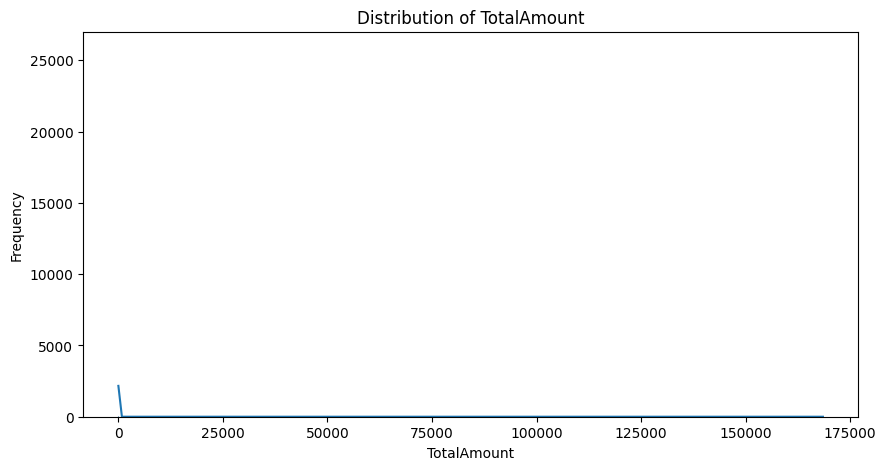

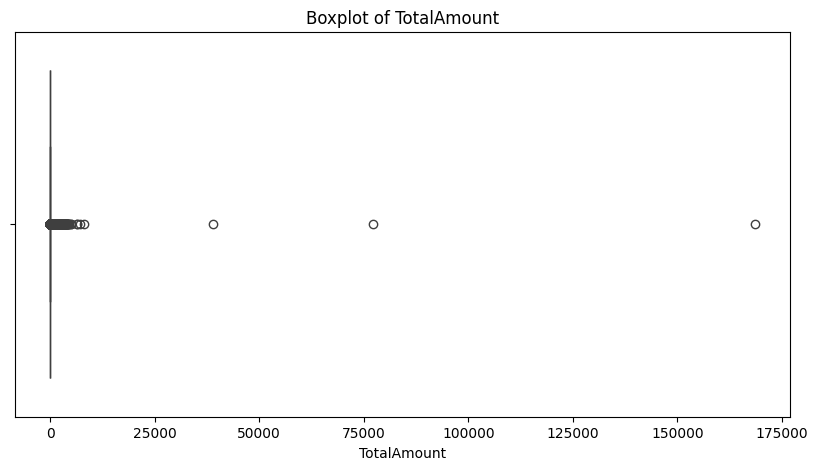


Summary Statistics for TotalAmount:
count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64


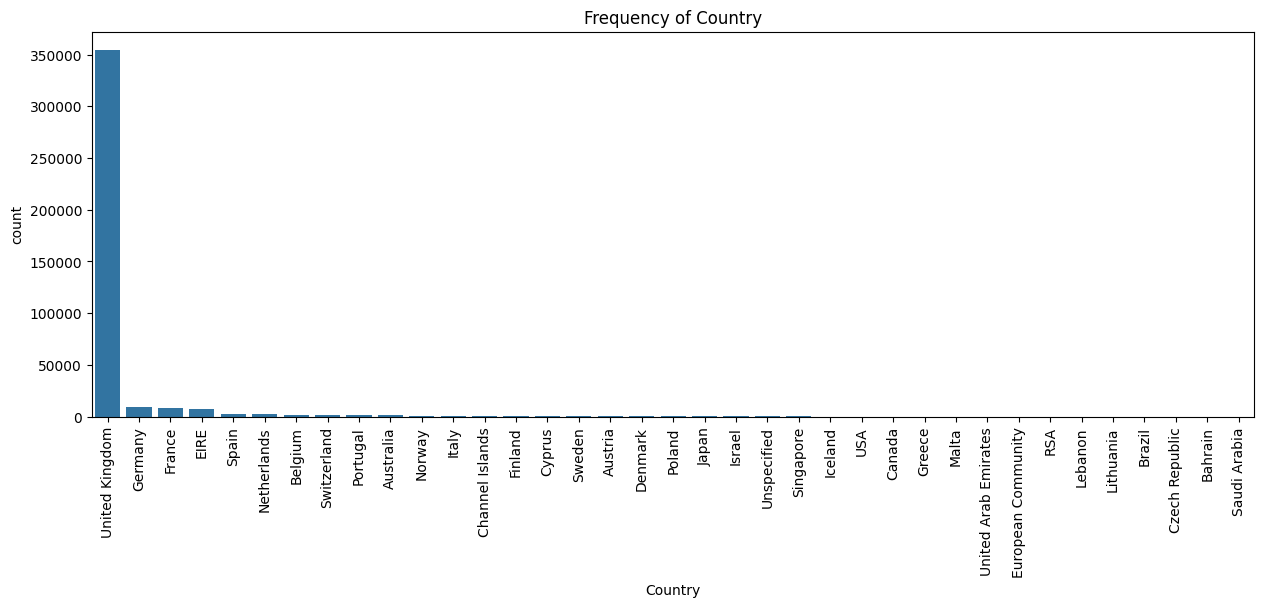


Value Counts for Country:
Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Leba

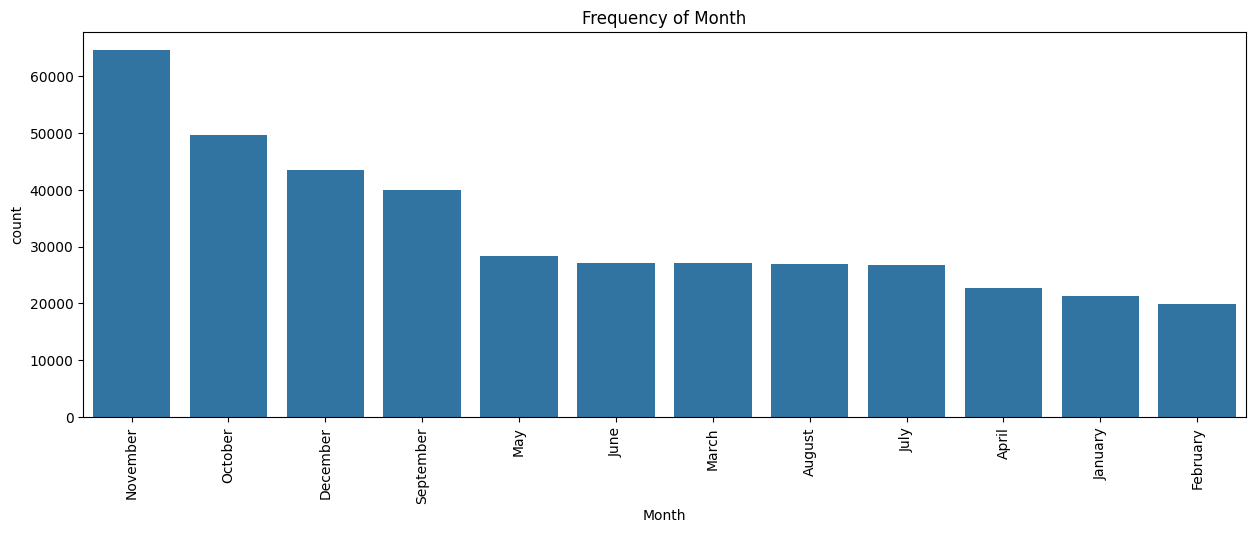


Value Counts for Month:
Month
November     64531
October      49554
December     43461
September    40028
May          28320
June         27185
March        27175
August       27007
July         26825
April        22642
January      21229
February     19927
Name: count, dtype: int64


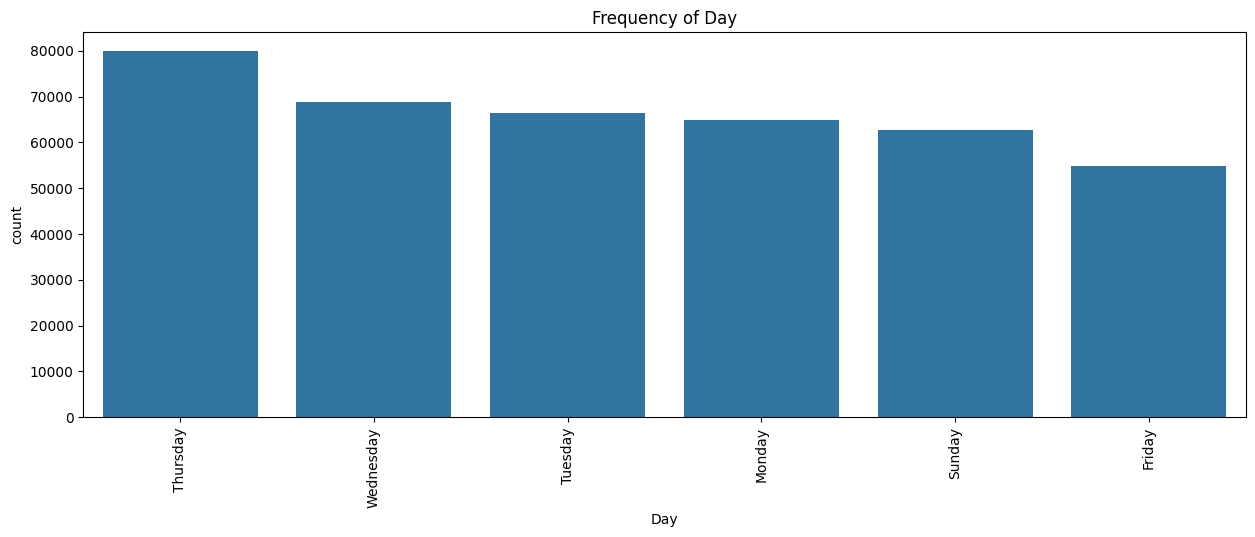


Value Counts for Day:
Day
Thursday     80035
Wednesday    68885
Tuesday      66473
Monday       64893
Sunday       62773
Friday       54825
Name: count, dtype: int64


In [52]:
# Univariate Analysis for Numerical Features
numerical_features = ['Quantity', 'UnitPrice', 'TotalAmount']

for feature in numerical_features:
  plt.figure(figsize=(10, 5))
  sns.histplot(retail_df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

  plt.figure(figsize=(10, 5))
  sns.boxplot(x=retail_df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

  print(f"\nSummary Statistics for {feature}:")
  print(retail_df[feature].describe())

# Univariate Analysis for Categorical Features
categorical_features = ['Country', 'Month', 'Day']

for feature in categorical_features:
  plt.figure(figsize=(15, 5))
  sns.countplot(x=retail_df[feature], order=retail_df[feature].value_counts().index)
  plt.title(f'Frequency of {feature}')
  plt.xticks(rotation=90)
  plt.show()

  print(f"\nValue Counts for {feature}:")
  print(retail_df[feature].value_counts())

### **2.** **Bivariate** **Analysis**

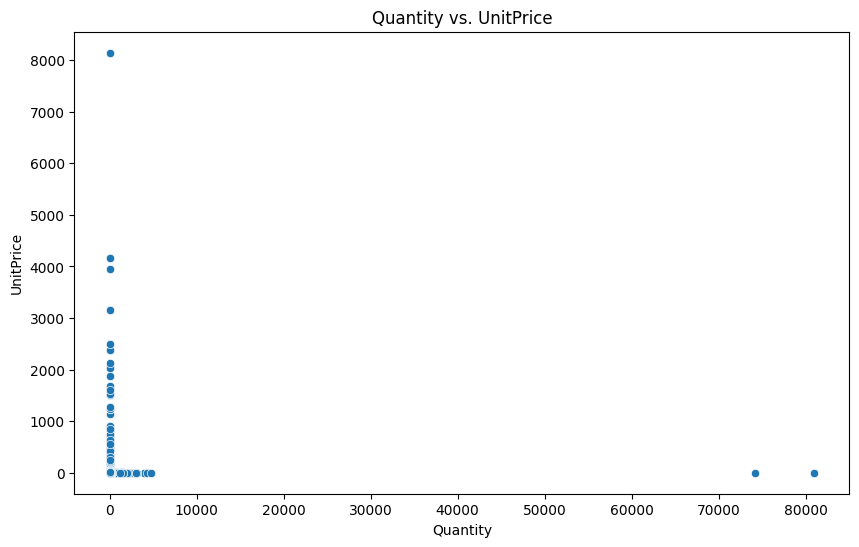

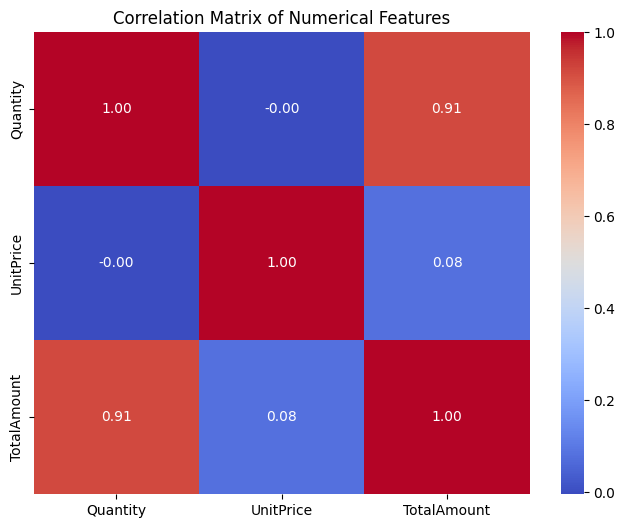

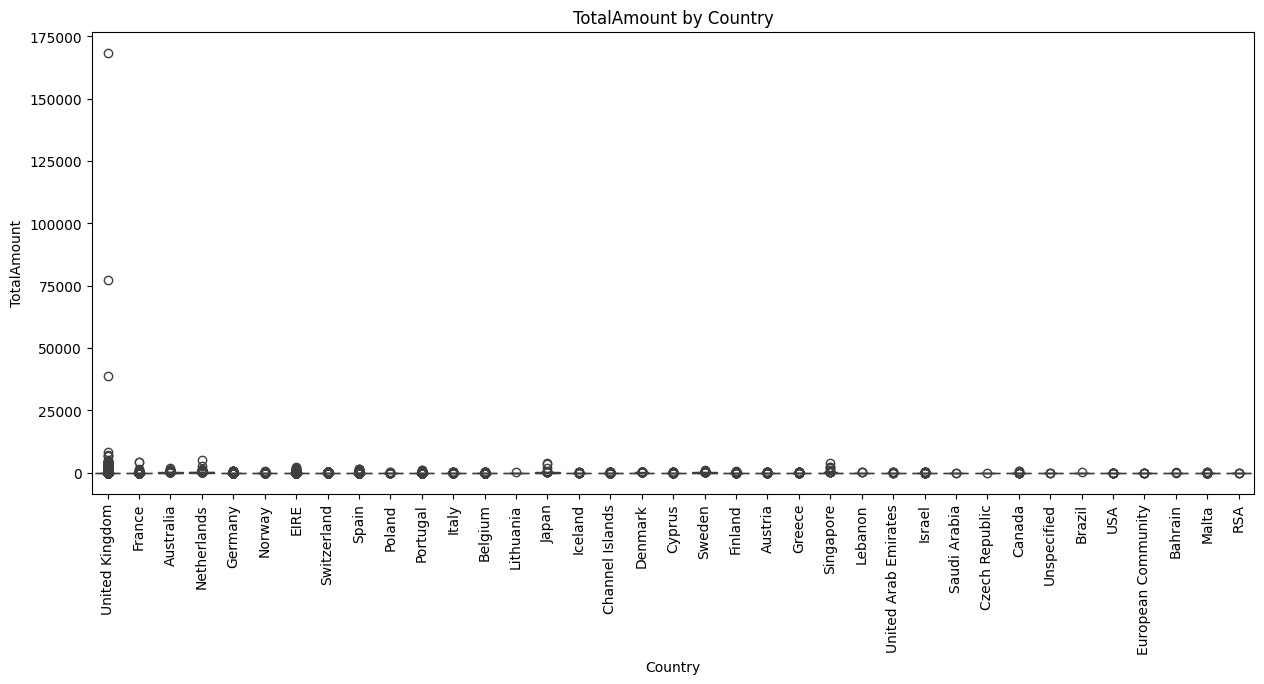

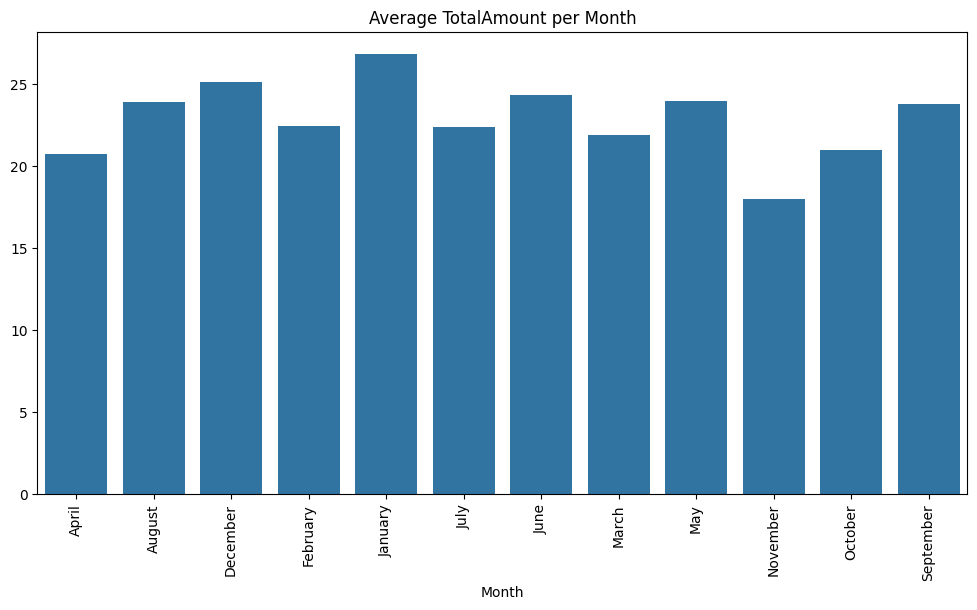

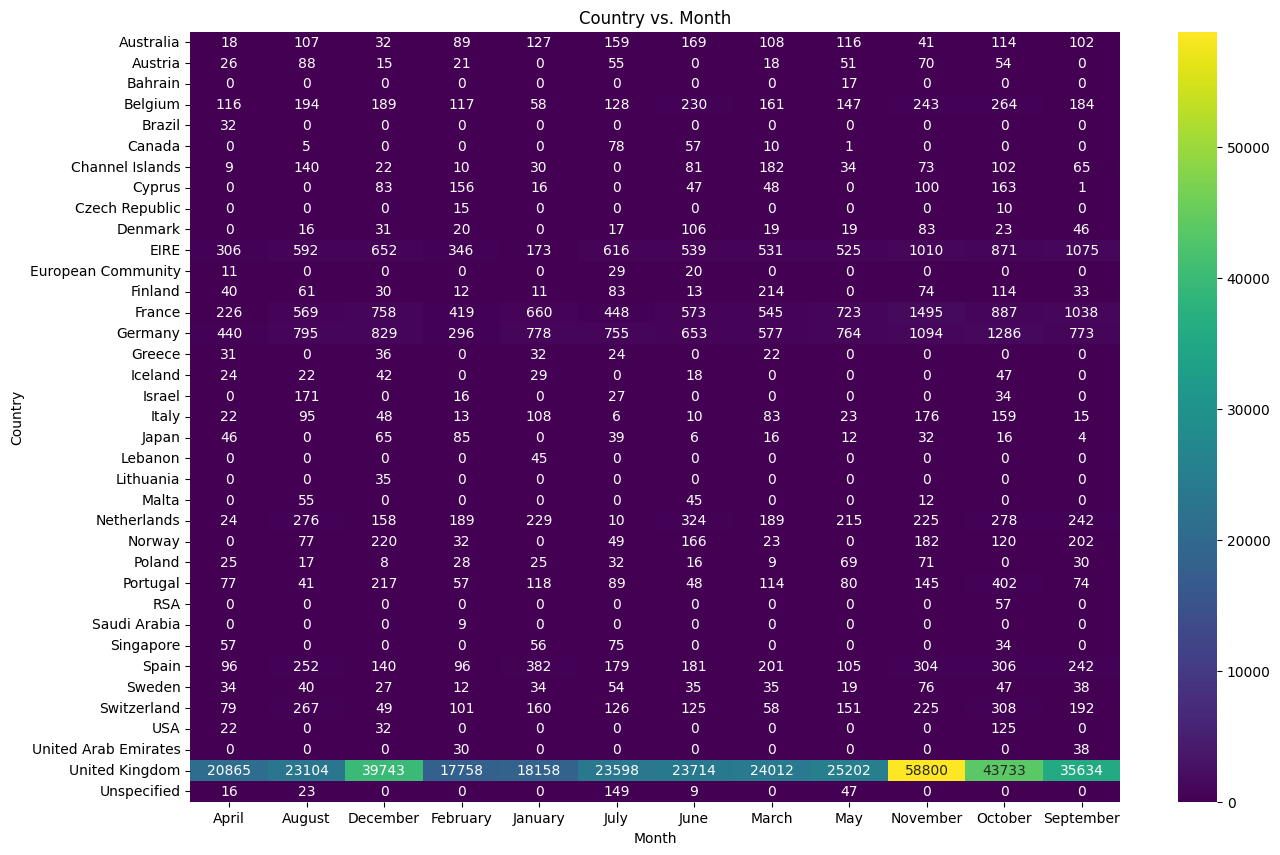

In [54]:
# Bivariate Analysis: Numerical vs. Numerical
# 1. Scatter plot: Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=retail_df)
plt.title('Quantity vs. UnitPrice')
plt.show()

# 2. Correlation matrix: Correlation between numerical features
correlation_matrix = retail_df[['Quantity', 'UnitPrice', 'TotalAmount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Bivariate Analysis: Numerical vs. Categorical
# 1. Boxplot: TotalAmount vs. Country
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='TotalAmount', data=retail_df)
plt.title('TotalAmount by Country')
plt.xticks(rotation=90)
plt.show()

# 2. Bar plot: Average TotalAmount per Month
plt.figure(figsize=(12, 6))
average_amount_per_month = retail_df.groupby('Month')['TotalAmount'].mean()
sns.barplot(x=average_amount_per_month.index, y=average_amount_per_month.values)
plt.title('Average TotalAmount per Month')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis: Categorical vs. Categorical
# 1. Contingency table and heatmap: Country vs. Month
contingency_table = pd.crosstab(retail_df['Country'], retail_df['Month'])
plt.figure(figsize=(15, 10))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Country vs. Month')
plt.show()